<h2>Set up file and import packages</h2>

In [856]:
import pandas as pd                     # data science essentials
import numpy as np                      # mathematical essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced graphical output
import statsmodels.formula.api as smf   # regression modeling

file = './birthweight_low.xlsx'

birthweight = pd.read_excel(io = file)

birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


<h4>Get an overview of the whole dataset</h4>

In [857]:
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


<h4>Identify continuous, interrval, and categorical variables</h4>

In [858]:
# dropping 'omaps' and 'fmaps' variables since we don't consider they are effective prediction factors
birthweight = birthweight.drop('omaps', axis = 1)
birthweight = birthweight.drop('fmaps', axis = 1)

<h2>Analyze variables and Build a base model</h2>

In [859]:
# printing out all column names for further use
for column in birthweight:
    print("'" + column + "'", end = ", ")

'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 

In [860]:
# creating a list of continuous features (including bwght)
continuous_data = ['mage', 'fage', 'bwght']

# developing a correlation matrix based on. continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with bwght
birthweight_corr.loc[: , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

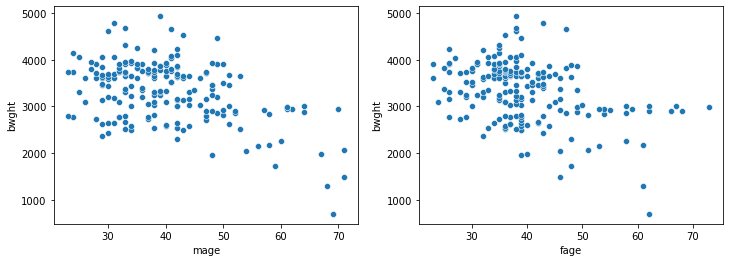

In [861]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 4))

# developing a scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(x    = 'mage',
                y    = 'bwght',
                data = birthweight)

# developing a scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x    = 'fage',
                y    = 'bwght',
                data = birthweight)

# showing the results
plt.show()

In [863]:
## building a base model with continuous variables

# instantiating a model objective
lm_best = smf.ols(formula = """bwght ~ mage + fage""",
                  data    = birthweight)

# fitting the data into the model object
results = lm_best.fit()

# printing the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.30
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           3.61e-12
Time:                        12:45:35   Log-Likelihood:                -1519.3
No. Observations:                 196   AIC:                             3045.
Df Residuals:                     193   BIC:                             3055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4765.6564    194.554     24.495      0.0

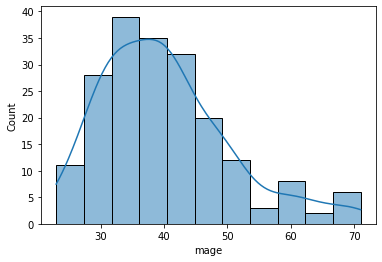

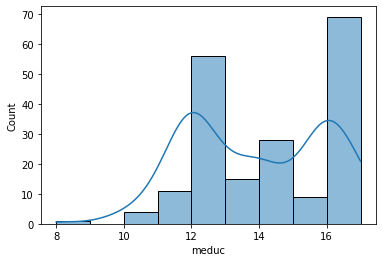

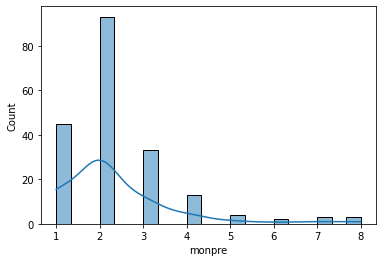

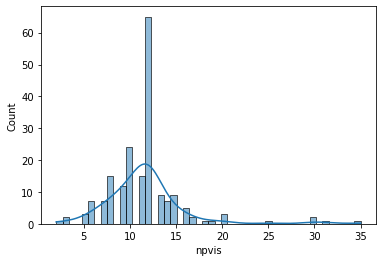

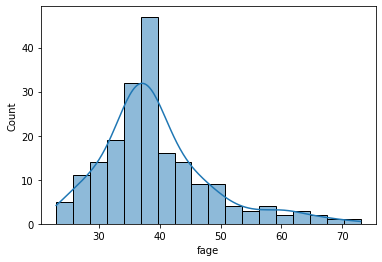

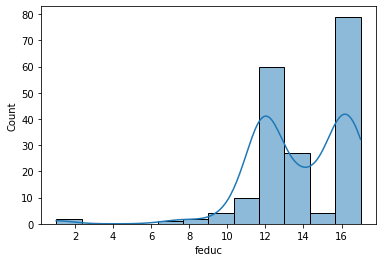

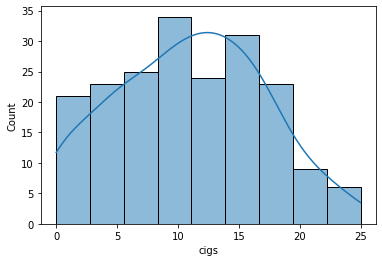

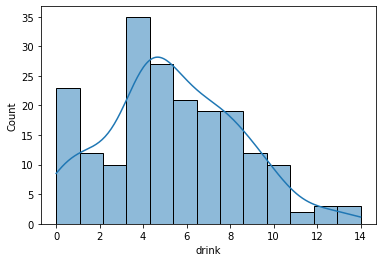

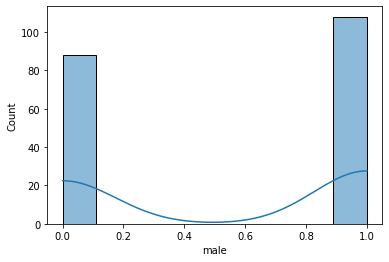

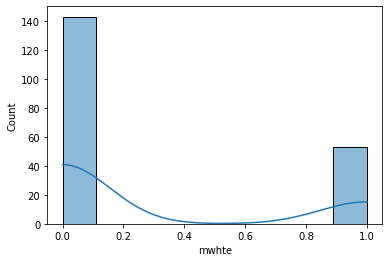

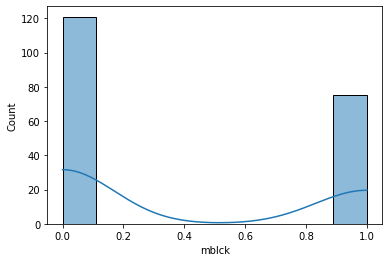

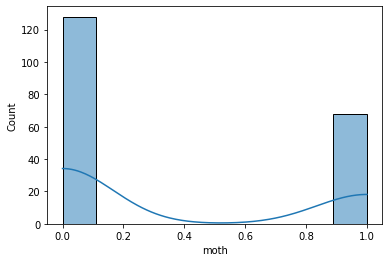

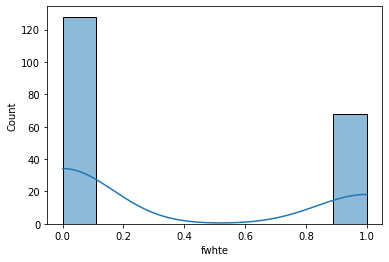

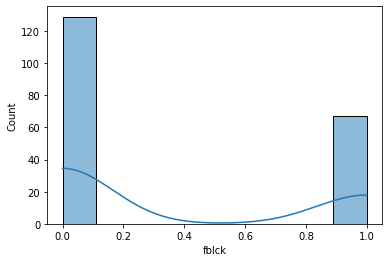

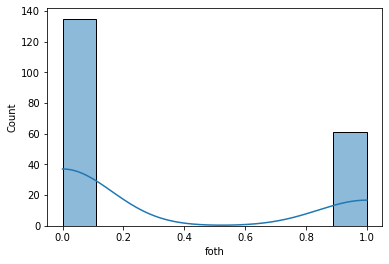

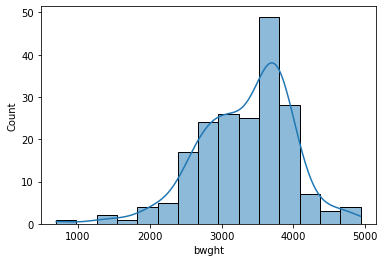

In [864]:
# building histplot of all the features to see the distribution
for variable in birthweight:
    sns.histplot(data = birthweight,
                 x    = variable,
                 kde  = True)
    
    plt.xlabel(xlabel = variable)
    plt.ylabel(ylabel = 'Count')
    
    plt.show()

Transform 'bwght' to logarithmic 'bwhgt' and see the distribution.

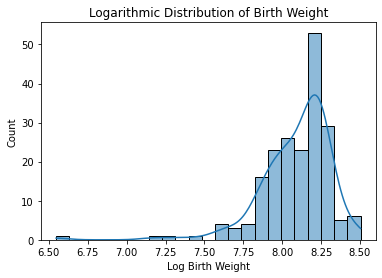

In [865]:
# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# developing a histogram
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)

# title and axis labels
plt.title(label = 'Logarithmic Distribution of Birth Weight')
plt.xlabel(xlabel = 'Log Birth Weight')
plt.ylabel(ylabel = 'Count')

# displaying the histogram
plt.show()

In [866]:
# building a base model with a log transformed response variable

# instantiating a model objective
lm_best = smf.ols(formula = """log_bwght ~ mage + fage""",
                  data    = birthweight)

# fitting the data into the model object
results = lm_best.fit()

# printing the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     35.27
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           8.79e-14
Time:                        12:45:50   Log-Likelihood:                 39.066
No. Observations:                 196   AIC:                            -72.13
Df Residuals:                     193   BIC:                            -62.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6285      0.069    125.893      0.0

<b> Confirm that 'log_bwhgt' has a higher R2. Use 'log_bwght' for further modeling.

<h2>Review and imput missing values</h2>

In [867]:
birthweight.isnull().sum()

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
dtype: int64

In [868]:
# looping to detect with missing values
for col in birthweight:
    
    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)
        
# summing the missing value flags to check the results of the loop above
birthweight.iloc[:, -3:].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [869]:
birthweight.shape

(196, 20)

In [870]:
birthweight_drop = birthweight.dropna()
birthweight_drop.shape

(186, 20)

10 observations will be dropped if I drop the missing values. It is not a good idea. \
Thus, instead of dropping datapoints, I fill the missing values as 0.

<em>Assume that the people who didn't fill the blanks in education and prenatal visits niether went to school nor went to any prenatal visit.</em>

In [871]:
# instantiating an imputation value
fill = 0

#imputing everything with the zero
birthweight['meduc'] = birthweight['meduc'].fillna(value = fill)
birthweight['npvis'] = birthweight['npvis'].fillna(value = fill)
birthweight['feduc'] = birthweight['feduc'].fillna(value = fill)

# making sure all missing values have been taken care of
birthweight.isnull().any(axis = 0). any(axis = 0)

False

<h2>Develop trend-based features</h2>
    
<h4>Continuous variables</h4>


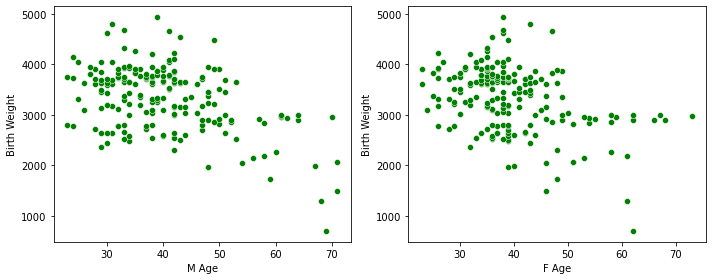

In [872]:
########################
# Visualizing the trend
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 4))

# developing a scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(x     = birthweight['mage'],
                y     = birthweight['bwght'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'M Age')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x     = birthweight['fage'],
                y     = birthweight['bwght'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'F Age')
plt.ylabel(ylabel = 'Birth Weight')

#cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()

General speaking, although there are some outliers, it seems negative correlated.

In [873]:
# log the variables and see the change of correlation
birthweight['log_mage'] = np.log(birthweight['mage'])
birthweight['log_fage'] = np.log(birthweight['fage'])

log_corr = birthweight.loc[ : , ['mage', 'log_mage',
                                 'fage', 'log_fage',
                                 'bwght', 'log_bwght'] ].corr(method = 'pearson')\
                                                        .round(decimals = 2)

log_corr.loc[ :, ['bwght', 'log_bwght']]

,bwght,log_bwght
mage,-0.46,-0.50
log_mage,-0.42,-0.44
fage,-0.40,-0.41
log_fage,-0.38,-0.39
bwght,1.00,0.97
log_bwght,0.97,1.00


'log_bwght' has higher R2 with 'mage' and 'fage'.
Logarithm doesn't help for 'mage' and 'fage' features. Drop them.

In [874]:
# dropping useless features
birthweight = birthweight.drop('log_mage', axis = 1)
birthweight = birthweight.drop('log_fage', axis = 1)

# checking results
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'log_bwght', 'm_meduc', 'm_npvis', 'm_feduc'],
      dtype='object')

<h4> Interval/count variables </h4>


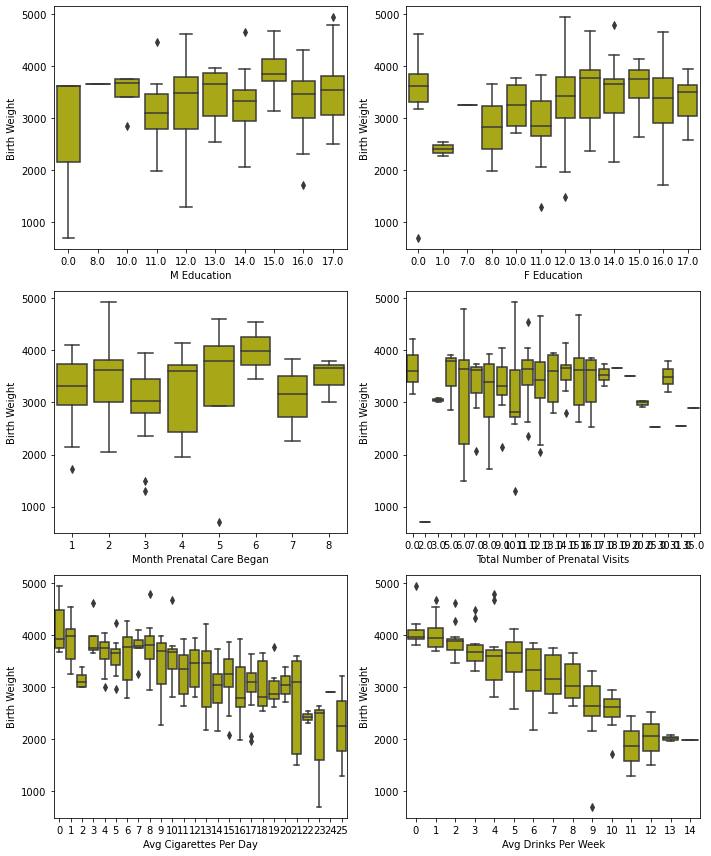

In [875]:
########################
# Visualizing the trend
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a boxplot
plt.subplot(3, 2, 1)
sns.boxplot(x     = birthweight['meduc'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'M Education')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(3, 2, 2)
sns.boxplot(x     = birthweight['feduc'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'F Education')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(3, 2, 3)
sns.boxplot(x     = birthweight['monpre'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Month Prenatal Care Began')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(3, 2, 4)
sns.boxplot(x     = birthweight['npvis'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(3, 2, 5)
sns.boxplot(x     = birthweight['cigs'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Avg Cigarettes Per Day')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(3, 2, 6)
sns.boxplot(x     = birthweight['drink'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Avg Drinks Per Week')
plt.ylabel(ylabel = 'Birth Weight')


#cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()

Obviously, 'Avg Cigarettes/Day' and 'Avg Drinks/Wk' are negative correlated to 'bwght'.\
The rest 4 variables need further navigation.

In [876]:
# log the variables and see the change of correlation
birthweight['log_meduc'] = np.log(birthweight['meduc'])
birthweight['log_feduc'] = np.log(birthweight['feduc'])
birthweight['log_monpre'] = np.log(birthweight['monpre'])
birthweight['log_npvis'] = np.log(birthweight['npvis'])
birthweight['log_cigs'] = np.log(birthweight['cigs'])
birthweight['log_drink'] = np.log(birthweight['drink'])

log_corr = birthweight.loc[ : , ['meduc', 'log_meduc',
                                 'feduc', 'log_feduc',
                                 'monpre', 'log_monpre',
                                 'npvis', 'log_npvis',
                                 'cigs', 'log_cigs',
                                 'drink', 'log_drink',
                                 'bwght', 'log_bwght'] ].corr(method = 'pearson')\
                                                        .round(decimals = 2)

log_corr.loc[ :, ['bwght', 'log_bwght']]

/Users/alicehuang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,bwght,log_bwght
meduc,0.16,0.23
log_meduc,0.10,0.10
feduc,0.10,0.16
log_feduc,0.17,0.18
monpre,-0.05,-0.09
log_monpre,-0.06,-0.09
npvis,0.04,0.09
log_npvis,0.16,0.24
cigs,-0.57,-0.55
log_cigs,-0.45,-0.42


Based on the correlation, choose to use 

<em>Y: 'log_bwght' </em>


    

* Analyze 'meduc' and 'feduc'

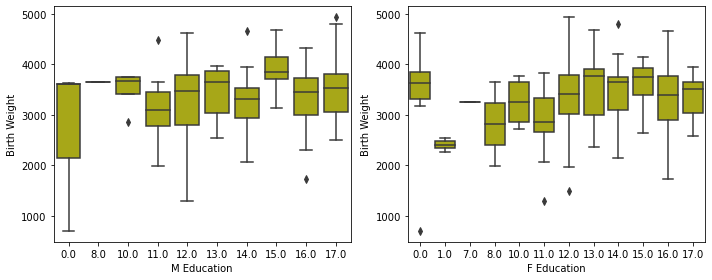


Count of each variables

-----------
M Education
-----------
0.0      3
8.0      1
10.0     4
11.0    11
12.0    56
13.0    15
14.0    28
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64

-----------
F Education
-----------
0.0      7
1.0      2
7.0      1
8.0      2
10.0     4
11.0    10
12.0    60
13.0     6
14.0    21
15.0     4
16.0    53
17.0    26
Name: feduc, dtype: int64



In [877]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 4))

# developing a boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x     = birthweight['meduc'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'M Education')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x     = birthweight['feduc'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'F Education')
plt.ylabel(ylabel = 'Birth Weight')


#cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()


# printing value counts
print(f"""
Count of each variables
=======================

-----------
M Education
-----------
{birthweight['meduc'].value_counts(normalize = False).sort_index()}

-----------
F Education
-----------
{birthweight['feduc'].value_counts(normalize = False).sort_index()}
""")

According to research, parent's education level has not signinfcant but some impact to birthweight because of knowledge limitation in younger age, possibility of being single during pregnancy, and probability of living in households with less frinancial resources.

Hence, group parents' education to ... \
<b>'limited' - below high school (below 12 years)\
'avg' - high school (12 ~ 16 years)\
'adv' - college (over 16 years)</b>

<em>Ref: Chevalier, A. & O'Sullivan, V. (2007). Monther's Education and Birth Weight. https://ftp.iza.org/dp2640.pdf</em>

In [878]:
## grouping 'meduc' to categorical variable

# creating placeholder list
meduc_group_lst = []

# looping to group observations by var (number of years)
for var in birthweight['meduc']:
    
    # below high school
    if var < 12:
        meduc_group_lst.append('meduc_limited')
    
    # above high school
    else:
        meduc_group_lst.append('meduc_adv')

# concatenating with original Dataframe
birthweight['meduc_group'] = pd.Series(meduc_group_lst)

# checking results
birthweight['meduc_group']

0      meduc_limited
1          meduc_adv
2          meduc_adv
3          meduc_adv
4          meduc_adv
           ...      
191        meduc_adv
192        meduc_adv
193        meduc_adv
194        meduc_adv
195        meduc_adv
Name: meduc_group, Length: 196, dtype: object

In [879]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

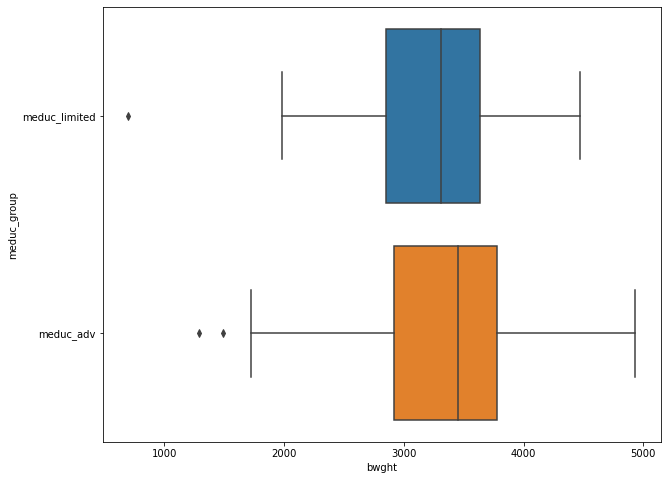

In [880]:
# using the defined function to create boxplots
categorical_boxplots(response  = 'bwght',
                     cat_var   = 'meduc_group',
                     data      = birthweight)

<em>The grouping education level of monthers show a better trend of slightly positive correlation.</em>

In [881]:
## grouping 'feduc' to categorical variable

# creating placeholder list
feduc_group_lst = []

# looping to group observations by var (number of years)
for var in birthweight['feduc']:
    
    # below high school
    if var < 12:
        feduc_group_lst.append('feduc_limited')
    
    # above high school
    else:
        feduc_group_lst.append('feduc_adv')

# concatenating with original Dataframe
birthweight['feduc_group'] = pd.Series(feduc_group_lst)

# checking results
birthweight['feduc_group']

0      feduc_limited
1      feduc_limited
2          feduc_adv
3          feduc_adv
4          feduc_adv
           ...      
191    feduc_limited
192        feduc_adv
193        feduc_adv
194        feduc_adv
195        feduc_adv
Name: feduc_group, Length: 196, dtype: object

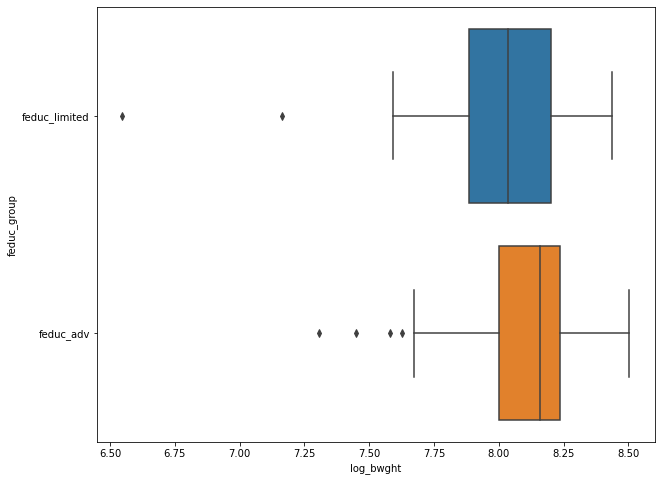

In [882]:
# using the defined function to create boxplots
categorical_boxplots(response  = 'log_bwght',
                     cat_var   = 'feduc_group',
                     data      = birthweight)

<em>In terms of father's education, it seems 'limited' education level leading to a lower birth weight.</em>

In [883]:
# creating dummies for parents' grouped education levels
m_educ      = pd.get_dummies(birthweight['meduc_group'])
f_educ      = pd.get_dummies(birthweight['feduc_group'])

# dropping categorical variables after they've been encoded 
birthweight = birthweight.drop('meduc_group', axis = 1)
birthweight = birthweight.drop('feduc_group', axis = 1)

# joining codings together
birthweight = birthweight.join([m_educ, f_educ])

#checking results
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'log_bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_meduc', 'log_feduc',
       'log_monpre', 'log_npvis', 'log_cigs', 'log_drink', 'meduc_adv',
       'meduc_limited', 'feduc_adv', 'feduc_limited'],
      dtype='object')

* Analyze 'monpre' and 'npvis'

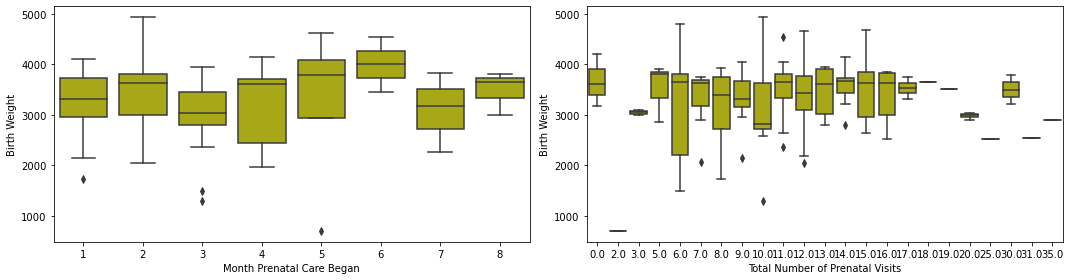


Count of each variables

-----------
Month Prenatal Visit Began
-----------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64

-----------
Total Prenatal Visits
-----------
0.0      3
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    65
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name: npvis, dtype: int64



In [884]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 4))


# developing a boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x     = birthweight['monpre'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Month Prenatal Care Began')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x     = birthweight['npvis'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birth Weight')


#cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()


# printing value counts
print(f"""
Count of each variables
=======================

-----------
Month Prenatal Visit Began
-----------
{birthweight['monpre'].value_counts(normalize = False).sort_index()}

-----------
Total Prenatal Visits
-----------
{birthweight['npvis'].value_counts(normalize = False).sort_index()}
""")

According to the prenatal appointment guide, typical schedule is expected with the following frequency:
* Weeks 4 to 28: Once a month 
* Weeks 28 to 36: Every other week
* Week 36 until birth: Every week 

<b>Based on the above schedule, having 15 visits is usual. Some extra exams may add up the number of total visits. From there, assume having over 20 visits might imply a potential issue of the baby.</b>

<em>Ref: Geddes, J.K.(2021). Your Guide to Prenatal Appointments. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3485451/#R27</em>

--------------------------------------------------------------------------------------------

Based on Kessner Index, prenatal care is concerned if no visits are obtained by the 21st gestational week and only 4 or fewer visits are made by the delivery.

<b>Thus, define a good prenatal care is to begin prenatal visit by (21/4) months and obtain at least 4 visits during pregnancy.</b>

<em>Ref: J Pediatr. (2013). Does the relationship between prenatal care and birth weight vary by oral cleft? Evidence using South American and U.S. samples. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3485451/#R27</em>

In [885]:
# creating a new categorical variable to test the prenatal care level
birthweight['precare'] = 0

# looping to group observations by the criteria
for index, value in birthweight.iterrows():
    
    if birthweight.loc[index, 'monpre'] == 1 and birthweight.loc[index, 'npvis'] >= 15:
        birthweight.loc[index, 'precare'] = 'precare_good'
        
    elif birthweight.loc[index, 'monpre'] == 2 and birthweight.loc[index, 'npvis'] >= 14:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 3 and birthweight.loc[index, 'npvis'] >= 13:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 4 and birthweight.loc[index, 'npvis'] >= 12:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 5 and birthweight.loc[index, 'npvis'] >= 11:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 6 and birthweight.loc[index, 'npvis'] >= 10:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 7 and birthweight.loc[index, 'npvis'] >= 9:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 8 and birthweight.loc[index, 'npvis'] >= 7:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 9 and birthweight.loc[index, 'npvis'] >= 5:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'monpre'] == 10 and birthweight.loc[index, 'npvis'] >= 4:
        birthweight.loc[index, 'precare'] = 'precare_good'
    
    elif birthweight.loc[index, 'npvis'] >= 20:
        birthweight.loc[index, 'precare'] = 'precare_concern'
    
    else:
        birthweight.loc[index, 'precare'] = 'precare_concern'

# checking results
birthweight['precare'].value_counts

<bound method IndexOpsMixin.value_counts of 0      precare_concern
1      precare_concern
2      precare_concern
3      precare_concern
4      precare_concern
            ...       
191       precare_good
192    precare_concern
193       precare_good
194    precare_concern
195    precare_concern
Name: precare, Length: 196, dtype: object>

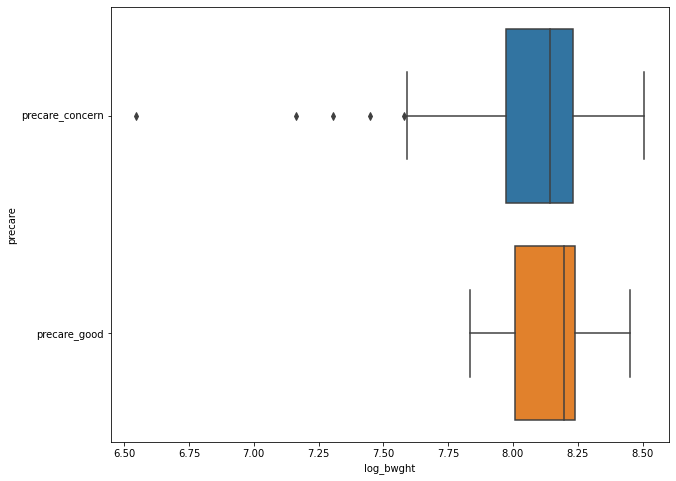

In [886]:
# using the defined function to create boxplots
categorical_boxplots(response = 'log_bwght',
                     cat_var  = 'precare',
                     data = birthweight)

In [887]:
# creating dummies for precare level
precare_level = pd.get_dummies(birthweight['precare'])

# dropping categorical variables after they've been encoded 
birthweight = birthweight.drop('precare', axis = 1)

# joining codings together
birthweight = birthweight.join([precare_level])

#checking results
birthweight.columns


Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'log_bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_meduc', 'log_feduc',
       'log_monpre', 'log_npvis', 'log_cigs', 'log_drink', 'meduc_adv',
       'meduc_limited', 'feduc_adv', 'feduc_limited', 'precare_concern',
       'precare_good'],
      dtype='object')

* Analyze 'cigs' and 'drink'

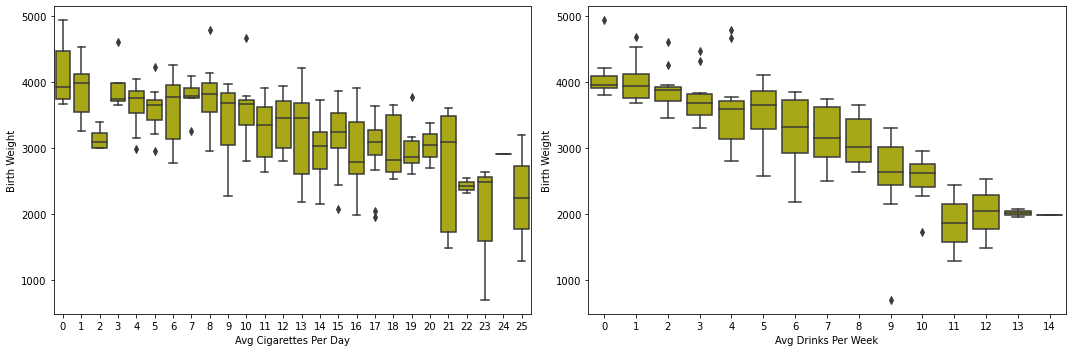


Count of each variables

-----------
Avg Cig/Day
-----------
0      9
1      8
2      4
3      4
4      8
5     11
6      9
7      5
8     11
9     11
10    10
11    13
12     9
13    15
14    11
15     9
16    11
17    12
18     5
19     6
20     2
21     5
22     2
23     3
24     1
25     2
Name: cigs, dtype: int64

-----------
Avg Drink/Wk
-----------
0     11
1     12
2     12
3     10
4     35
5     27
6     21
7     19
8     19
9     12
10    10
11     2
12     3
13     2
14     1
Name: drink, dtype: int64



In [888]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 5))


# developing a boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x     = birthweight['cigs'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Avg Cigarettes Per Day')
plt.ylabel(ylabel = 'Birth Weight')

########################

# developing a boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x     = birthweight['drink'],
            y     = birthweight['bwght'],
            color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Avg Drinks Per Week')
plt.ylabel(ylabel = 'Birth Weight')


#cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()


# printing value counts
print(f"""
Count of each variables
=======================

-----------
Avg Cig/Day
-----------
{birthweight['cigs'].value_counts(normalize = False).sort_index()}

-----------
Avg Drink/Wk
-----------
{birthweight['drink'].value_counts(normalize = False).sort_index()}
""")

In terms of alcohol consumption, it is a constant negative correlation with baby's birth weight, whereas trend of cigarette needs further navigation.

Research has shown smoking during pregnancy has a significant effect to babies' weight reduction. It's encouraged that if a pregnant woman is unable to quit smoking, she should at least reduce consumption to less than 6 cigarettes per day.

<b>Thus, group smoking behavior to 3 categories: none, some, and heavy.</b>

<em>Ref: Kataoka et al. (2018). Smoking during pregnancy and harm reduction in birth weight: a corss-sectional study. https://bmcpregnancychildbirth.biomedcentral.com/articles/10.1186/s12884-018-1694-4</em>

In [889]:
# creating a new categorical variable for smoking group
birthweight['smoke'] = 0

# looping group observations by criteria
for index, var in birthweight.iterrows():
    if birthweight.loc[index, 'cigs'] == 0:
        birthweight.loc[index, 'smoke'] = 'smoke_none'
        
    elif birthweight.loc[index, 'cigs'] < 6:
        birthweight.loc[index, 'smoke'] = 'smoke_some'
        
    else:
        birthweight.loc[index, 'smoke'] = 'smoke_heavy'

# checking results
birthweight['smoke'].value_counts()

smoke_heavy    152
smoke_some      35
smoke_none       9
Name: smoke, dtype: int64

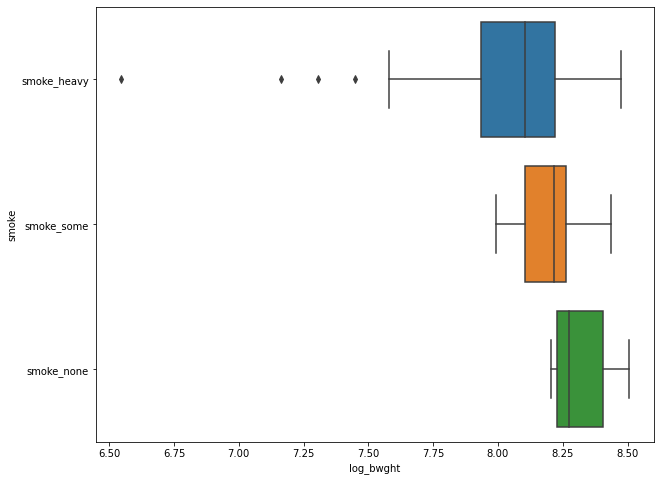

In [890]:
# using the defined function to create boxplots
categorical_boxplots(response = 'log_bwght',
                     cat_var  = 'smoke',
                     data     = birthweight)

In [891]:
# creating dummies for smoke level
smoke_level = pd.get_dummies(birthweight['smoke'])

# dropping categorical variables after they've been encoded 
birthweight = birthweight.drop('smoke', axis = 1)

# joining codings together
birthweight = birthweight.join([smoke_level])

#checking results
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'log_bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_meduc', 'log_feduc',
       'log_monpre', 'log_npvis', 'log_cigs', 'log_drink', 'meduc_adv',
       'meduc_limited', 'feduc_adv', 'feduc_limited', 'precare_concern',
       'precare_good', 'smoke_heavy', 'smoke_none', 'smoke_some'],
      dtype='object')

<h4>Categorical Data</h4>

In [892]:
# creating a list of categorical features (including bwght)
categorical_data = ['male', 'mwhte', 'mblck','moth', 'fwhte', 'fblck', 'foth']

# developing a correlation matrix based on. continuous features
birthweight[categorical_data]


,male,mwhte,mblck,moth,fwhte,fblck,foth
0,1,0,1,0,0,1,0
1,1,1,0,0,1,0,0
2,1,0,1,0,0,1,0
3,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
191,1,0,1,0,0,0,1
192,1,0,1,0,0,1,0
193,0,1,0,0,1,0,0
194,1,0,1,0,0,1,0


As all the categorical variables are dummies already, they are ready for modeling.

<h2>Build predictive models</h2>

In [893]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink',
       'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght',
       'log_bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_meduc', 'log_feduc',
       'log_monpre', 'log_npvis', 'log_cigs', 'log_drink', 'meduc_adv',
       'meduc_limited', 'feduc_adv', 'feduc_limited', 'precare_concern',
       'precare_good', 'smoke_heavy', 'smoke_none', 'smoke_some'],
      dtype='object')

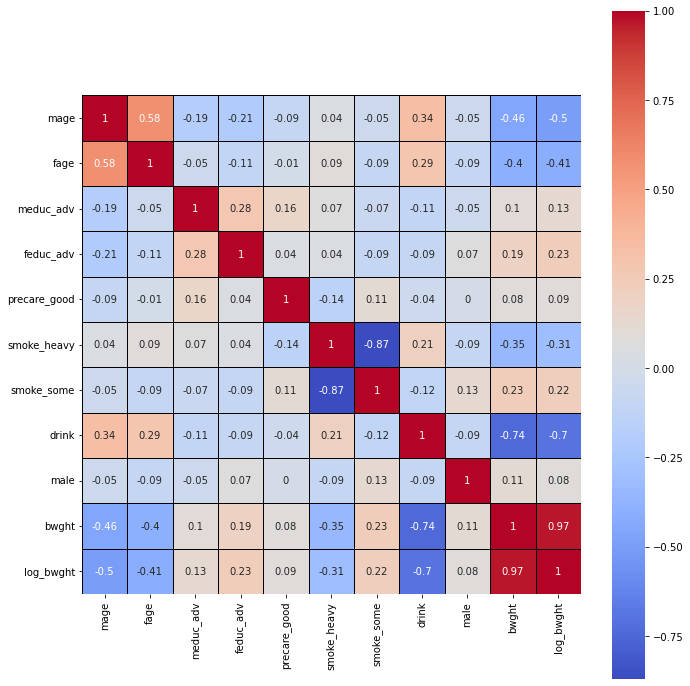

In [894]:
## correction heatmap

# instantiating a correlation matrix
bw_corr = birthweight.corr().round(decimals = 2)

# limiting the size of the correlation matrix
bw_limit_corr = bw_corr.loc[['mage', 'fage', 'meduc_adv', 'feduc_adv', 
                             'precare_good', 'smoke_heavy', 'smoke_some', 
                             'drink', 'male', 'bwght', 'log_bwght'],
                            ['mage', 'fage', 'meduc_adv', 'feduc_adv', 
                             'precare_good', 'smoke_heavy', 'smoke_some', 
                             'drink', 'male', 'bwght', 'log_bwght']]

# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))

# visualizing the correlation matrix
sns.heatmap(bw_limit_corr,
            cmap       = 'coolwarm',
            square     = True,
            annot      = True,
            linecolor  = 'black',
            linewidths = 0.5)

plt.tight_layout()
plt.show()

'log_bwght' shows a higher correlation with 5 features, whereas 'bwght' only shows 4 higher score.
<b>Hence, use 'log_bwght'.<b>

In [895]:
# making a list of birthweight_explanatory (x-variables)
birthweight_explanatory = birthweight.drop(['log_meduc', 'log_feduc', 
                                            'log_monpre', 'log_npvis',
                                            'log_cigs', 'log_drink',
                                            'bwght', 'log_bwght'],
                                            axis = 1)

# formatting each explanatory variable for statmodels
for val in birthweight_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_none +
smoke_some +


In [900]:
## building a full model

# blueprinting a model type
lm_fit = smf.ols(formula = """ log_bwght ~ mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_none +
smoke_some """,
                 data = birthweight)

# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()

# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     20.68
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           8.98e-37
Time:                        12:56:27   Log-Likelihood:                 131.18
No. Observations:                 196   AIC:                            -218.4
Df Residuals:                     174   BIC:                            -146.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4336      0.036     67.461      0.000       2.362       2.505
mage               -0.0049      0.001     -3.886      0.000      -0.007      -0.002
meduc               0.0090      0.007      1.310      0.192      -0.005       0.023
monpre             -0.0018      0.009     -0.187      0.852      -0.020       0.017
npvis               0.0035      0.004      1.000      0.319      -0.003       0.011
fage               -0.0015      0.001     -1.085      0.279      -0.004       0.001
feduc               0.0003      0.006      0.049      0.961      -0.012       0.013
cigs               -0.0164      0.003     -6.372      0.000      -0.021      -0.011
drink              -0.0343      0.004     -9.031      0.000      -0.042      -0.027
male               -0.0041      0.020     -0.208      0.836      -0.043       0.035
mwhte               0.8418      0.031     27.522      0.000       0.781       0.902
mblck               0.7837      0.043     18.212      0.000       0.699       0.869
moth                0.8081      0.035     22.814      0.000       0.738       0.878
fwhte               0.7848      0.029     27.243      0.000       0.728       0.842
fblck               0.8282      0.043     19.295      0.000       0.743       0.913
foth                0.8207      0.038     21.423      0.000       0.745       0.896
m_meduc            -0.2748      0.132     -2.089      0.038      -0.534      -0.015
m_npvis             0.2766      0.094      2.933      0.004       0.090       0.463
m_feduc             0.0864      0.117      0.736      0.463      -0.145       0.318
meduc_adv           1.1899      0.030     39.565      0.000       1.131       1.249
meduc_limited       1.2437      0.025     49.518      0.000       1.194       1.293
feduc_adv           1.2475      0.028     44.417      0.000       1.192       1.303
feduc_limited       1.1862      0.028     41.705      0.000       1.130       1.242
precare_concern     1.2218      0.019     63.927      0.000       1.184       1.259
precare_good        1.2119      0.030     39.763      0.000       1.152       1.272
smoke_heavy         0.8497      0.029     29.591      0.000       0.793       0.906
smoke_none          0.7878      0.036     21.619      0.000       0.716       0.860
smoke_some          0.7961      0.026     30.504      0.000       0.745       0.848
==============================================================================
Omnibus:                       43.510   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.683
Skew:                          -0.743   Prob(JB):                     8.75e-43
Kurtosis:                       7.638   Cond. No.                     2.92e+17
==============================================================================

Note

<b>Try out different combinations to find the best model with all variables having p-value below 0.05.</b>

In [901]:
## building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_none +
smoke_some """,
                 data = birthweight)

# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()

# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     38.26
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.56e-43
Time:                        12:56:32   Log-Likelihood:                -1423.1
No. Observations:                 196   AIC:                             2872.
Df Residuals:                     183   BIC:                             2915.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1386.8262     38.928     35.625      0.000    1310.020    1463.632
mage              -12.8394      2.818     -4.557      0.000     -18.399      -7.280
cigs              -40.9958      6.885     -5.955      0.000     -54.579     -27.412
drink            -117.0722      9.849    -11.886      0.000    -136.505     -97.639
mwhte             504.5154     76.380      6.605      0.000     353.817     655.214
mblck             446.9767     82.241      5.435      0.000     284.715     609.238
moth              435.3341     76.559      5.686      0.000     284.283     586.386
fwhte             426.0506     66.798      6.378      0.000     294.258     557.844
fblck             460.1215     92.146      4.993      0.000     278.316     641.927
foth              500.6541     75.595      6.623      0.000     351.504     649.804
meduc_adv         692.5140     46.061     15.035      0.000     601.635     783.393
meduc_limited     694.3122     56.541     12.280      0.000     582.757     805.868
feduc_adv         777.4558     42.876     18.133      0.000     692.860     862.051
feduc_limited     609.3704     55.280     11.023      0.000     500.301     718.439
precare_concern   684.3901     36.426     18.789      0.000     612.522     756.258
precare_good      702.4361     41.446     16.948      0.000     620.662     784.210
smoke_heavy       507.3408     70.925      7.153      0.000     367.406     647.276
smoke_none        473.9388     95.196      4.979      0.000     286.116     661.762
smoke_some        405.5466     59.257      6.844      0.000     288.632     522.461
==============================================================================
Omnibus:                        3.345   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                3.552
Skew:                          -0.112   Prob(JB):                        0.169
Kurtosis:                       3.620   Cond. No.                     3.46e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [902]:
# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """ log_bwght ~ mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_none +
smoke_some """,
                 data = birthweight)

# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()

# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     31.99
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.07e-38
Time:                        12:58:33   Log-Likelihood:                 119.35
No. Observations:                 196   AIC:                            -212.7
Df Residuals:                     183   BIC:                            -170.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4654      0.015    165.692      0.000       2.436       2.495
mage               -0.0055      0.001     -5.085      0.000      -0.008      -0.003
cigs               -0.0163      0.003     -6.179      0.000      -0.021      -0.011
drink              -0.0373      0.004     -9.900      0.000      -0.045      -0.030
mwhte               0.8417      0.029     28.831      0.000       0.784       0.899
mblck               0.8130      0.031     25.865      0.000       0.751       0.875
moth                0.8107      0.029     27.703      0.000       0.753       0.868
fwhte               0.8041      0.026     31.494      0.000       0.754       0.854
fblck               0.8137      0.035     23.102      0.000       0.744       0.883
foth                0.8476      0.029     29.336      0.000       0.791       0.905
meduc_adv           1.2397      0.018     70.415      0.000       1.205       1.274
meduc_limited       1.2257      0.022     56.716      0.000       1.183       1.268
feduc_adv           1.2732      0.016     77.688      0.000       1.241       1.306
feduc_limited       1.1922      0.021     56.424      0.000       1.151       1.234
precare_concern     1.2281      0.014     88.212      0.000       1.201       1.256
precare_good        1.2372      0.016     78.100      0.000       1.206       1.268
smoke_heavy         0.8640      0.027     31.872      0.000       0.811       0.918
smoke_none          0.7943      0.036     21.829      0.000       0.722       0.866
smoke_some          0.8071      0.023     35.633      0.000       0.762       0.852
==============================================================================
Omnibus:                      125.201   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1638.911
Skew:                          -2.146   Prob(JB):                         0.00
Kurtosis:                      16.500   Cond. No.                     3.46e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>As 'bwght' gives a higher R2, use 'bwght' for modeling.</b>

<h2>Train and test the model</h2>

In [904]:
# importing additional packages
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression     # linear regression (scikit-learn)

# declaring set of x-variables
x_variables = ['mage', 'cigs', 'drink', 'mwhte', 'mblck', 'moth', 'fwhte', 
               'fblck', 'foth','meduc_adv', 'meduc_limited', 'feduc_adv', 
               'feduc_limited', 'precare_concern', 'precare_good', 
               'smoke_heavy', 'smoke_some', 'smoke_none']

# setting up x and y
x_ols = birthweight.loc[ : , x_variables ]
x_full = birthweight_explanatory

y = birthweight.loc[ : , 'bwght']

# splitting train and test set
x_train, x_test, y_train, y_test = train_test_split(x_full, y,
                                                    test_size    = 0.25,
                                                    random_state = 219)

# checking the shapes of train and test datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 27)
y-side: (147,)


Testing Data
------------
X-side: (49, 27)
y-side: (49,)



In [905]:
# looping to make x-variables suitable for statsmodels
for var in x_variables:
    print(f"{var} +")

mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_some +
smoke_none +


In [906]:
# merging x_train and y_train so that they can be used in statmodels
bwght_train = pd.concat([x_train, y_train], axis = 1)

# building a model
lm_best = smf.ols(formula = """ bwght ~ mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
meduc_adv +
meduc_limited +
feduc_adv +
feduc_limited +
precare_concern +
precare_good +
smoke_heavy +
smoke_some +
smoke_none """,
                 data = bwght_train)

# fiting the model based on the data
results = lm_best.fit()

# printing the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     30.17
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.45e-32
Time:                        13:00:18   Log-Likelihood:                -1068.5
No. Observations:                 147   AIC:                             2163.
Df Residuals:                     134   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1407.6441     46.624     

<h4>Model development in scikit-learn</h4>

In [907]:
## setting up 2 train-test split

# full x-dataset
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
    x_full, # full x-variables
    y,
    test_size = 0.25,
    random_state = 219)

# OLS x-dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
    x_ols,     # selected x-variables
    y,
    test_size = 0.25,
    random_state = 219)


Define a function to run regression models, and also create placeholders in global environment to store the ouput from local function.\
<em>Ref: https://stackoverflow.com/questions/14051916/how-to-make-a-local-variable-inside-a-function-global</em>

In [909]:
# creating placeholders
md_train_score = 0
md_test_score = 0
md_test_gap = 0

# building a function to run different type of regressions
def reg_model(mname, model, x_train, x_test, y_train, y_test):
    
    global md_train_score
    global md_test_score
    global md_test_gap
    
    # instantiating the model object
    md = model
    
    # fitting to the training data
    md_fit = md.fit(x_train, y_train)
    
    # predicting new data
    md_pred = md_fit.predict(x_test)
    
    #scoring results
    print(f'{mname} Training Score :', md.score(x_train, y_train).round(4))
    print(f'{mname} Testing Score :', md.score(x_test, y_test).round(4))
    
    md_train_score = md.score(x_train, y_train).round(4)
    md_test_score = md.score(x_test, y_test).round(4)
    
    # displaying and saving the gap between train and test
    print(f'{mname} Train-Test Gap :', abs(md_train_score - md_test_score).round(4))
    
    md_test_gap = abs(md_train_score - md_test_score).round(4)
    

In [910]:
# developing an OLS regression model
ols_model = reg_model(mname   = 'OLS',
                      model   = LinearRegression(),
                      x_train = x_train_OLS,
                      x_test  = x_test_OLS,
                      y_train = y_train_OLS,
                      y_test  = y_test_OLS)


# checking the outputs are saved to global environment
ols_train_score = md_train_score
ols_test_score = md_test_score
ols_test_gap = md_test_gap

print(ols_train_score, ols_test_score, ols_test_gap)

OLS Training Score : 0.7299
OLS Testing Score : 0.6013
OLS Train-Test Gap : 0.1286
0.7299 0.6013 0.1286


In [911]:
# importing additional package
import sklearn.linear_model

# developing a Lasso regression model
reg_model(mname   = 'Lasso',
          model   = sklearn.linear_model.Lasso(alpha = 1.0, normalize = True),
          x_train = x_train_full,
          x_test  = x_test_full,
          y_train = y_train_full,
          y_test  = y_test_full)

# checking the outputs are saved to global environment
lasso_train_score = md_train_score
lasso_test_score = md_test_score
lasso_test_gap = md_test_gap

print(lasso_train_score, lasso_test_score, lasso_test_gap)

Lasso Training Score : 0.7413
Lasso Testing Score : 0.6303
Lasso Train-Test Gap : 0.111
0.7413 0.6303 0.111


/Users/alicehuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [912]:
# developing an ARD regression model
reg_model(mname   = 'ARD',
          model   = sklearn.linear_model.ARDRegression(),
          x_train = x_train_full,
          x_test  = x_test_full,
          y_train = y_train_full,
          y_test  = y_test_full)

# checking the outputs are saved to global environment
ard_train_score = md_train_score
ard_test_score = md_test_score
ard_test_gap = md_test_gap

print(ard_train_score, ard_test_score, ard_test_gap)

ARD Training Score : 0.7342
ARD Testing Score : 0.6465
ARD Train-Test Gap : 0.0877
0.7342 0.6465 0.0877


In [913]:
# comparing results

print(f"""
Model    Train Score    Test Score    Train-Test Gap
-----    -----------    ----------    --------------
OLS      {ols_train_score}         {ols_test_score}        {ols_test_gap}
Lasso    {lasso_train_score}         {lasso_test_score}        {lasso_test_gap}
*ARD     {ard_train_score}         {ard_test_score}        {ard_test_gap}

* final model
""")


Model    Train Score    Test Score    Train-Test Gap
-----    -----------    ----------    --------------
OLS      0.7299         0.6013        0.1286
Lasso    0.7413         0.6303        0.111
*ARD     0.7342         0.6465        0.0877

* final model

